# How Have Inmigration and Women Integration Changed Science Research?

Nobel prizes had always been a reference human achivements and a gauge to understand what have bee the relevant advances in different sciences fields, besides the Peace category prize. Therefore this dataset potentially contains useful information to understand the gender contributions to mayor discoveries. Also, we will discover if we can get relevant information about the effect of mobility of scientific researchers.

We will explore Nobel prizes dataset to try to answer this question from a quantitative perspective. It contains data of all Nobel prizes awarded since 1901 to 2020

### 1. Import, select and consolidate working dataset

In [1]:
# Import packages needed

import numpy as np
import pandas as pd
import requests 

pd.set_option('display.max_colwidth', None)

Import dataset from Nobel Organization API, and select variables needed

In [2]:
url = 'http://api.nobelprize.org/2.0/laureates?limit=1000&nobelPrizeYear=1901&yearTo=2020&format=json&csvLang=en' # storing api url into variable url

r = requests.get(url) # get request

json_data = r.json() # storing json response in a variable

type(json_data) # exploring data type

dict

In [3]:
# Expland the json file and load it in a dataframe
df = pd.json_normalize(json_data['laureates'])

# Explore the content
df.head(3)

,id,gender,nobelPrizes,knownName.en,knownName.se,givenName.en,givenName.se,familyName.en,familyName.se,fullName.en,...,birthCountry.no,birthCountry.se,birthCountryNow.en,birthCountryNow.no,birthCountryNow.se,birthContinent.en,knownName.no,givenName.no,familyName.no,fullName.no
0,745,male,"[{'awardYear': '2001', 'category': {'en': 'Economic Sciences', 'no': 'Økonomi', 'se': 'Ekonomi'}, 'categoryFullName': {'en': 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel', 'no': 'Sveriges Riksbanks pris i økonomisk vitenskap til minne om Alfred Nobel', 'se': 'Sveriges Riksbanks pris i ekonomisk vetenskap till Alfred Nobels minne'}, 'sortOrder': '2', 'portion': '1/3', 'dateAwarded': '2001-10-10', 'prizeStatus': 'received', 'motivation': {'en': 'for their analyses of markets with asymmetric information', 'se': 'för deras analys av marknader med assymetrisk informations'}, 'prizeAmount': 10000000, 'prizeAmountAdjusted': 12426230, 'affiliations': [{'name': {'en': 'Stanford University', 'no': 'Stanford University', 'se': 'Stanford University'}, 'nameNow': {'en': 'Stanford University'}, 'city': {'en': 'Stanford, CA', 'no': 'Stanford, CA', 'se': 'Stanford, CA'}, 'country': {'en': 'USA', 'no': 'USA', 'se': 'USA'}, 'cityNow': {'en': 'Stanford, CA', 'no': 'Stanford, CA', 'se': 'Stanford, CA'}, 'countryNow': {'en': 'USA', 'no': 'USA', 'se': 'USA'}, 'locationString': {'en': 'Stanford, CA, USA', 'no': 'Stanford, CA, USA', 'se': 'Stanford, CA, USA'}}], 'links': {'rel': 'nobelPrize', 'href': 'https://masterdataapi.nobelprize.org/2/nobelPrize/eco/2001', 'action': 'Get', 'types': 'application/json'}}]",A. Michael Spence,A. Michael Spence,A. Michael,A. Michael,Spence,Spence,A. Michael Spence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102,male,"[{'awardYear': '1975', 'category': {'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'}, 'categoryFullName': {'en': 'The Nobel Prize in Physics', 'no': 'Nobelprisen i fysikk', 'se': 'Nobelpriset i fysik'}, 'sortOrder': '1', 'portion': '1/3', 'dateAwarded': '1975-10-17', 'prizeStatus': 'received', 'motivation': {'en': 'for the discovery of the connection between collective motion and particle motion in atomic nuclei and the development of the theory of the structure of the atomic nucleus based on this connection', 'se': 'för upptäckten av sambandet mellan kollektiva rörelser och partikelrörelser i atomkärnor, samt den därpå baserade utvecklingen av teorien för atomkärnans struktur'}, 'prizeAmount': 630000, 'prizeAmountAdjusted': 3440490, 'affiliations': [{'name': {'en': 'Niels Bohr Institute', 'no': 'Niels Bohr Institute', 'se': 'Niels Bohr Institute'}, 'nameNow': {'en': 'Niels Bohr Institute'}, 'city': {'en': 'Copenhagen', 'no': 'København', 'se': 'Köpenhamn'}, 'country': {'en': 'Denmark', 'no': 'Danmark', 'se': 'Danmark'}, 'cityNow': {'en': 'Copenhagen', 'no': 'København', 'se': 'Köpenhamn'}, 'countryNow': {'en': 'Denmark', 'no': 'Danmark', 'se': 'Danmark'}, 'locationString': {'en': 'Copenhagen, Denmark', 'no': 'København, Danmark', 'se': 'Köpenhamn, Danmark'}}], 'links': {'rel': 'nobelPrize', 'href': 'https://masterdataapi.nobelprize.org/2/nobelPrize/phy/1975', 'action': 'Get', 'types': 'application/json'}}]",Aage N. Bohr,Aage N. Bohr,Aage N.,Aage N.,Bohr,Bohr,Aage Niels Bohr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,779,male,"[{'awardYear': '2004', 'category': {'en': 'Chemistry', 'no': 'Kjemi', 'se': 'Kemi'}, 'categoryFullName': {'en': 'The Nobel Prize in Chemistry', 'no': 'Nobelprisen i kjemi', 'se': 'Nobelpriset i kemi'}, 'sortOrder': '1', 'portion': '1/3', 'dateAwarded': '2004-10-06', 'prizeStatus': 'received', 'motivation': {'en': 'for the discovery of ubiquitin-mediated protein degradation', 'se': 'för upptäckten av ubiquitinmedierad proteinnedbrytning'}, 'prizeAmount': 10000000, 'prizeAmountAdjusted': 11888331, 'affiliations': [{'name': {'en': 'Technion - Israel Institute of Technology', 'no': 'Technion - Israel Institute of Technology', 'se': 'Technion - Israel Institute of Tec

In [4]:
# Select the relevant columns
df = df[['gender', 'nobelPrizes', 'knownName.en', 
         'birth.date', 'birth.place.city.en', 'birth.place.country.en','birth.place.continent.en', 
         'death.date', 'death.place.city.en', 'death.place.country.en', 'death.place.continent.en']]

__'nobelPrizes'__ column cotains more relevant information for our analysis stored in nested dictionaries. Let's extract it and create new columns

In [5]:
# Expand information contained in 'nobelPrizes' in separate columns

df['award_year'] = df['nobelPrizes'].map(lambda x: x[0]['awardYear'])
df['category'] = df['nobelPrizes'].map(lambda x: x[0]['category']['en'])
df['status'] = df['nobelPrizes'].map(lambda x: x[0]['prizeStatus'])
df['prize_amount'] = df['nobelPrizes'].map(lambda x: x[0]['prizeAmountAdjusted'])
df['prize_portion'] = df['nobelPrizes'].map(lambda x: x[0]['portion'])

In [6]:
def get_affiliations_name(x):
    '''Extracts affiliation name'''
    try:
        return df['nobelPrizes'][x][0]['affiliations'][0]['name']['en']
    except:
        return 'no_affiliation'

def get_affiliations_city(x):
    '''Extracts affiliation city'''
    try:
        return df['nobelPrizes'][x][0]['affiliations'][0]['city']['en']
    except:
        return 'no_affiliation'
    
def get_affiliations_country(x):
    '''Extracts affiliation country'''
    try:
        return df['nobelPrizes'][x][0]['affiliations'][0]['country']['en']
    except:
        return 'no_affiliation'

In [7]:
# Expand information contained in 'nobelPrizes' in separate columns

df['affiliation_name'] = pd.Series([get_affiliations_name(x) for x in df.index])
df['affiliation_city'] = pd.Series([get_affiliations_city(x) for x in df.index])
df['affiliation_country'] = pd.Series([get_affiliations_country(x) for x in df.index])

In [8]:
df.drop('nobelPrizes', axis=1, inplace=True)

In [9]:
df.rename(columns = {'knownName.en':'name', 
                     'birth.date':'birth_date', 
                     'birth.place.city.en':'birth_city',
                     'birth.place.country.en':'birth_country', 
                     'birth.place.continent.en':'birth_continent', 
                     'death.date':'death_date',
                     'death.place.city.en':'death_city', 
                     'death.place.country.en':'death_country',
                     'death.place.continent.en':'death_continent'}, 
          inplace=True)

In [10]:
df.shape

(955, 18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               930 non-null    object
 1   name                 930 non-null    object
 2   birth_date           929 non-null    object
 3   birth_city           928 non-null    object
 4   birth_country        929 non-null    object
 5   birth_continent      929 non-null    object
 6   death_date           630 non-null    object
 7   death_city           611 non-null    object
 8   death_country        617 non-null    object
 9   death_continent      617 non-null    object
 10  award_year           955 non-null    object
 11  category             955 non-null    object
 12  status               955 non-null    object
 13  prize_amount         955 non-null    int64 
 14  prize_portion        955 non-null    object
 15  affiliation_name     955 non-null    object
 16  affiliat

In [12]:
df.head()

,gender,name,birth_date,birth_city,birth_country,birth_continent,death_date,death_city,death_country,death_continent,award_year,category,status,prize_amount,prize_portion,affiliation_name,affiliation_city,affiliation_country
0,male,A. Michael Spence,1943-00-00,"Montclair, NJ",USA,North America,NaN,NaN,NaN,NaN,2001,Economic Sciences,received,12426230,1/3,Stanford University,"Stanford, CA",USA
1,male,Aage N. Bohr,1922-06-19,Copenhagen,Denmark,Europe,2009-09-08,Copenhagen,Denmark,Europe,1975,Physics,received,3440490,1/3,Niels Bohr Institute,Copenhagen,Denmark
2,male,Aaron Ciechanover,1947-10-01,Haifa,British Protectorate of Palestine,Asia,NaN,NaN,NaN,NaN,2004,Chemistry,received,11888331,1/3,Technion - Israel Institute of Technology,Haifa,Israel
3,male,Aaron Klug,1926-08-11,Zelvas,Lithuania,Europe,2018-11-20,NaN,NaN,NaN,1982,Chemistry,received,3135612,1,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom
4,male,Abdus Salam,1926-01-29,Jhang Maghiāna,India,Asia,1996-11-21,Oxford,United Kingdom,Europe,1979,Physics,received,3019920,1/3,International Centre for Theoretical Physics,Trieste,Italy


These data above will be sufficient to gather insights to try to answer our original question. 

### 2. Cleaning dataset

The NaN observations 'name' or 'gender' categories represents prizes to organizations, not people. We are not interested on those. 

We can also remove observations in which we ignore birthdate since they are just a small amount (7)

In [13]:
# Drop data which no gender or name

df['name'].dropna(axis=0, inplace=True)

# Drop data with no birth date

df['birth_date'].dropna(axis=0, inplace=True)

We can create a new column indication if the laureate is alive.

In [14]:
df['is_alive'] = 0
df['is_alive'] = df['death_date'].isna()

In [15]:
# Correct data types

df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce', infer_datetime_format=True)
df['death_date'] = pd.to_datetime(df['death_date'], errors='coerce', infer_datetime_format=True)
df['award_year'] = df['award_year'].astype('int64')
df['prize_portion'] = df['prize_portion'].map({'1':1., '1/2':0.5, '1/3':0.33, '1/4':0.25}).astype('float')
df['gender'] = df['gender'].astype('category')
df['category'] = df['category'].astype('category')
df['status'] = df['status'].astype('category')

### 3. Explore the data

In [16]:
# Import packages

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [17]:
rcParams['font.family'] = 'Arial' # Set font type

In [18]:
sns.set_theme(style="whitegrid") # Set seaborn visual style

__How many women have been awarded with the Nobel prize since its creation?__

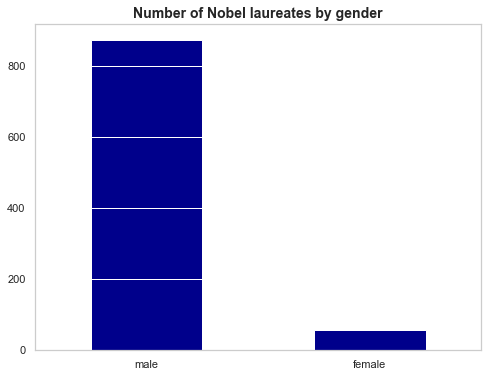

In [19]:
gender_n = df['gender'].value_counts()

fig  = plt.figure(figsize = (8,6), frameon=False)

gender_n.plot(kind='bar', zorder=0, color='darkblue')
plt.xticks(rotation=0)
plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.title('Number of Nobel laureates by gender', weight='bold', fontsize=14)
plt.grid(None, axis='x')
plt.show()

__Historically, women are x15 less likely to win a Nobel price than men__

__Has this proportion changed over time?__

In [20]:
laureates_by_gender = df[['award_year', 'gender']]
laureates_by_gender = pd.get_dummies(laureates_by_gender)

gender_by_year = laureates_by_gender.groupby(by='award_year').sum()


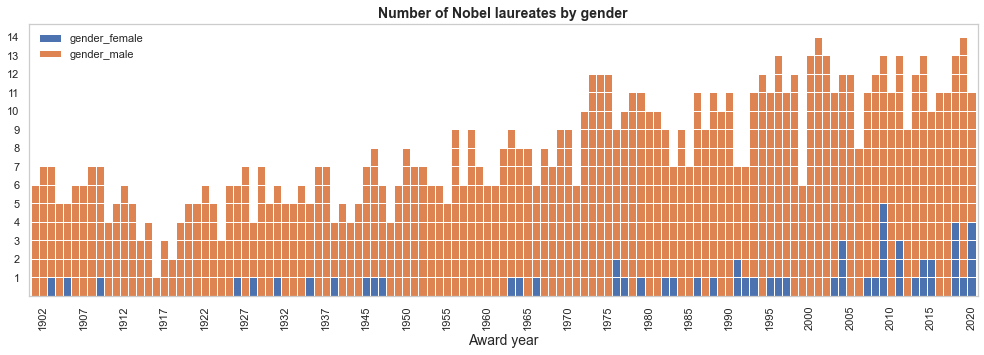

In [21]:
gender_by_year.plot(kind='bar', stacked=True, zorder=0, figsize=(17,5), width=1)
plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.grid(None, axis='x')
plt.title('Number of Nobel laureates by gender', weight='bold', fontsize=14)
plt.xticks(np.arange(1, 117, step=5), fontsize=11)
plt.yticks(np.arange(1, 15), fontsize=11)
plt.xlabel('Award year', fontsize=14)
plt.legend(frameon=False)
plt.show()

__In which categories women won more Nobel prices?__

In [22]:
gender_by_cat = pd.concat([df[['category']], pd.get_dummies(df['gender'])], axis=1)
gender_by_cat = gender_by_cat.groupby(by='category').sum()

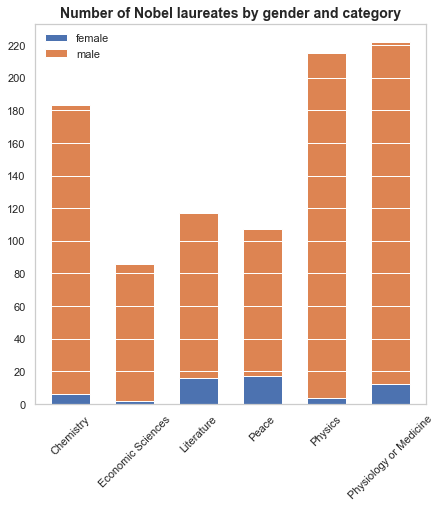

In [23]:
gender_by_cat.plot(kind='bar', stacked=True, zorder=0, figsize=(7,7), width=0.6)
plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.grid(None, axis='x')
plt.title('Number of Nobel laureates by gender and category', weight='bold', fontsize=14)
plt.yticks(np.arange(0,240,step=20))
plt.xticks(rotation=45, fontsize=11)
plt.xlabel(None)
plt.legend(frameon=False)
plt.show()

__How old are the laureates when they win the Nobel prize?__

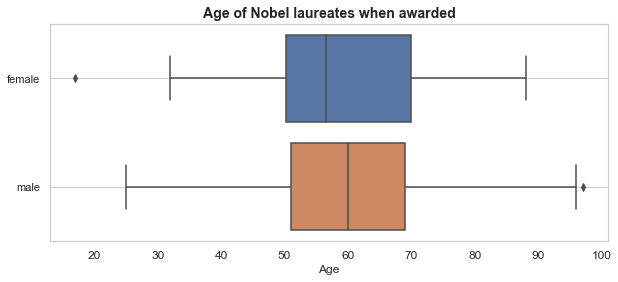

In [24]:
age_gender = df.loc[:,['award_year', 'birth_date', 'gender']]
age_gender['award_age'] = age_gender['award_year'] - age_gender['birth_date'].map(lambda x:x.year)
age_gender.dropna(axis=0, inplace=True)

fig = plt.figure(figsize=(10,4), frameon=False)

sns.boxplot(y="gender", x="award_age", data=age_gender, orient="h")
plt.xticks(fontsize=12)
plt.title('Age of Nobel laureates when awarded', weight='bold', fontsize=14)
plt.grid(None)
plt.ylabel(None)
plt.xlabel('Age')
plt.show()

In [25]:
age_gender.groupby(by='gender').mean()

,award_year,award_age
gender,,
female,1986.428571,58.25000
male,1970.535179,60.11534


__How has inmigration contributed to the Nobel laureates in research categories by country?__

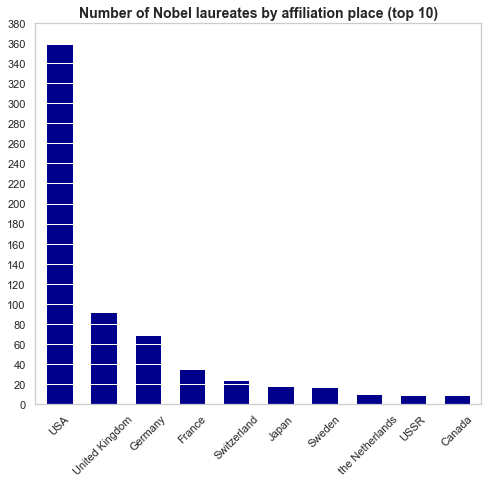

In [26]:
research_cat = df[(df['category'] != 'Peace') & (df['affiliation_country'] != 'no_affiliation')]
affiliation_country_n = research_cat['affiliation_country'].value_counts()
birth_country_n = research_cat['birth_country'].value_counts()

affiliation_country_n[:10].plot(kind='bar', zorder=0, color='darkblue', width=0.6, figsize=(8,7))
plt.xticks(rotation=45)
plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.title('Number of Nobel laureates by affiliation place (top 10)', weight='bold', fontsize=14)
plt.yticks(np.arange(0,400,step=20))
plt.grid(None, axis='x')

plt.show()

__What is the weight of immigration on research?__

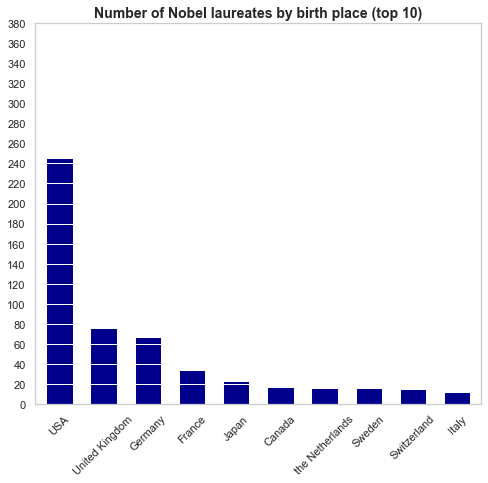

In [27]:
birth_country_n[:10].plot(kind='bar', zorder=0, color='darkblue', width=0.6, figsize=(8,7))
plt.xticks(rotation=45)
plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.title('Number of Nobel laureates by birth place (top 10)', weight='bold', fontsize=14)
plt.yticks(np.arange(0,400,step=20))
plt.grid(None, axis='x')
plt.show()

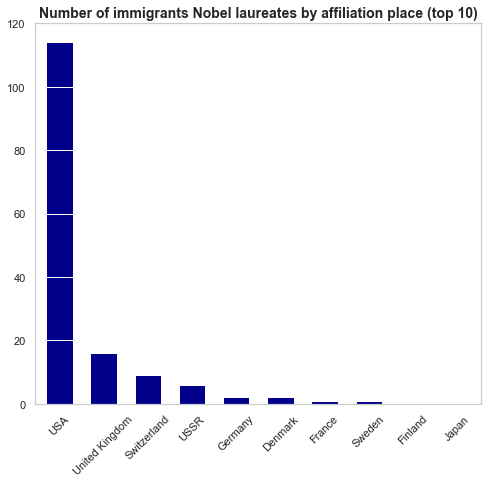

In [28]:
immigration = pd.concat([affiliation_country_n, birth_country_n], axis=1).dropna(axis=0)

immigration['immigrant'] = np.where(immigration['affiliation_country'] > immigration['birth_country'], immigration['affiliation_country'] - immigration['birth_country'], 0)
immigration['emigrant'] = np.where(immigration['affiliation_country'] < immigration['birth_country'], immigration['birth_country'] - immigration['affiliation_country'], 0)

immigration['immigrant'].sort_values(ascending=False)[:10].plot(kind='bar', zorder=0, color='darkblue', width=0.6, figsize=(8,7))
plt.xticks(rotation=45)
plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.title('Number of immigrants Nobel laureates by affiliation place (top 10)', weight='bold', fontsize=14)
plt.yticks(np.arange(0,140,step=20))
plt.grid(None, axis='x')

plt.show()

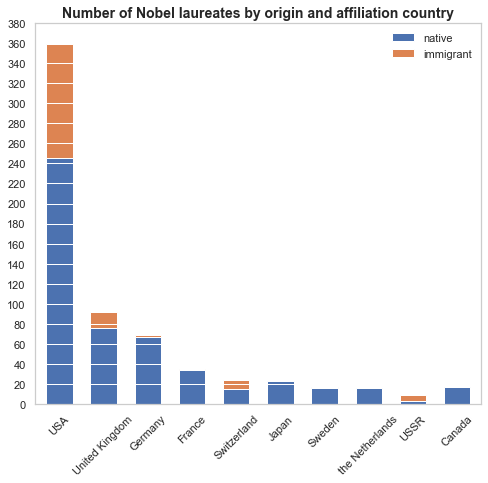

In [29]:
immigration.drop(['affiliation_country', 'emigrant'], axis=1)[:10].plot(kind='bar', stacked=True, zorder=0, figsize=(8,7), width=0.6)
plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.grid(None, axis='x')
plt.title('Number of Nobel laureates by origin and affiliation country', weight='bold', fontsize=14)
plt.yticks(np.arange(0,400,step=20))
plt.xticks(rotation=45, fontsize=11)
plt.xlabel(None)
plt.legend(frameon=False, labels=['native', 'immigrant'])
plt.show()

__Where do all the immigrant researchers come from?__

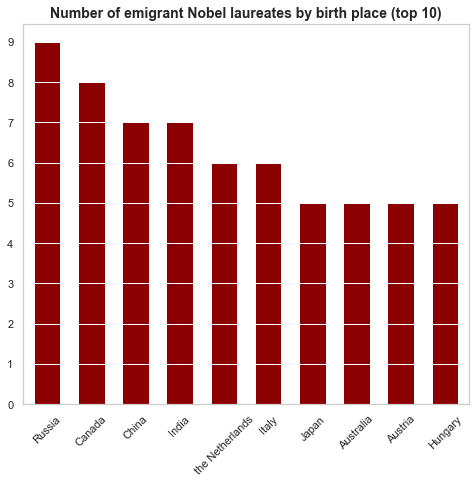

In [30]:
immigration['emigrant'].sort_values(ascending=False)[:10].plot(kind='bar', zorder=0, color='darkred', width=0.6, figsize=(8,7))
plt.xticks(rotation=45)
plt.grid(axis='y', color='white', linestyle='-', linewidth=1)
plt.title('Number of emigrant Nobel laureates by birth place (top 10)', weight='bold', fontsize=14)
plt.yticks(np.arange(0,10))
plt.grid(None, axis='x')
plt.show()